In [70]:
# Importamos las librerías necesarias

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn.functional as F

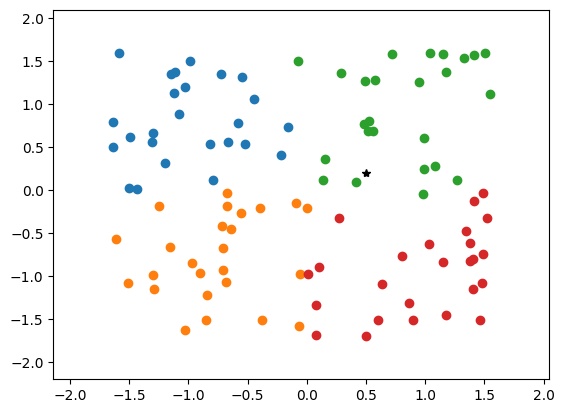

In [79]:
data = np.genfromtxt('Kvecinos.txt', delimiter='\t')
x = data[:, :2].astype(np.float32)
y = data[:, 2].astype(np.int64)
# normalizamos los datos
mu, std = np.mean(x, axis=0), np.std(x, axis=0)
x = (x - mu) / std

# Dato nuevo
P = (0.5, 0.2)


# Graficamos los datos
fig, ax = plt.subplots(1,1)
ax.scatter(x[y == 1, 0], x[y == 1, 1])
ax.scatter(x[y == 0, 0], x[y == 0, 1])
ax.scatter(x[y == 2, 0], x[y == 2, 1])
ax.scatter(x[y == 3, 0], x[y == 3, 1])
ax.plot(P[0], P[1], '*', c='black')
plt.xlim([x[:, 0].min()-0.5, x[:, 0].max()+0.5])
plt.ylim([x[:, 1].min()-0.5, x[:, 1].max()+0.5])
plt.show()

In [72]:
def kvecinos(muestra, dato_nuevo, etiquetas, k_vecinos=4):

    # Calcula la distancia del dato nuevo con la muestra
    dist = (dato_nuevo - muestra).pow(2).sum(axis=1).sqrt()

    # mezcla las distancias
    _, indices = torch.sort(dist)
    etiquetas = etiquetas[indices]

    # Get the Kth most similar samples and return the predominant class
    return etiquetas[:k_vecinos].bincount().argmax().item()

In [78]:
Muestra = torch.from_numpy(x)
Etiquetas = torch.from_numpy(y) # Las etiquetas son: 0 = naranja, 1 = azul, 2 = verde y 3 = rojo
Punto = torch.tensor(P)

kvecinos(Muestra, Punto, Etiquetas)


0

Se puede probar el código utilizando distintos valores para el punto  ```P```